<a href="https://colab.research.google.com/github/ubermenchh/learnpytorch/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ubermenchh/learnpytorch.git
%cd learnpytorch

Cloning into 'learnpytorch'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 36 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (36/36), 1.11 MiB | 13.27 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/learnpytorch


In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [3]:
train_data = datasets.CIFAR10(root='data', train=True, transform=ToTensor(), target_transform=None, download=True)
test_data = datasets.CIFAR10(root='data', train=False, transform=ToTensor(), download=True)

100%|██████████| 170498071/170498071 [00:13<00:00, 12721829.99it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [4]:
len(train_data), len(test_data)

(50000, 10000)

In [5]:
image, label = train_data[0]

In [6]:
image, label

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [7]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'frog')

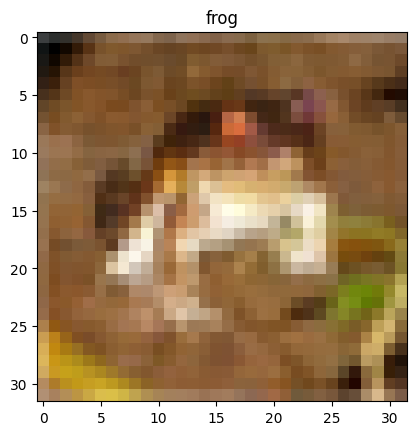

In [9]:
plt.imshow(torch.permute(image, (1, 2, 0)))
plt.title(class_names[label])

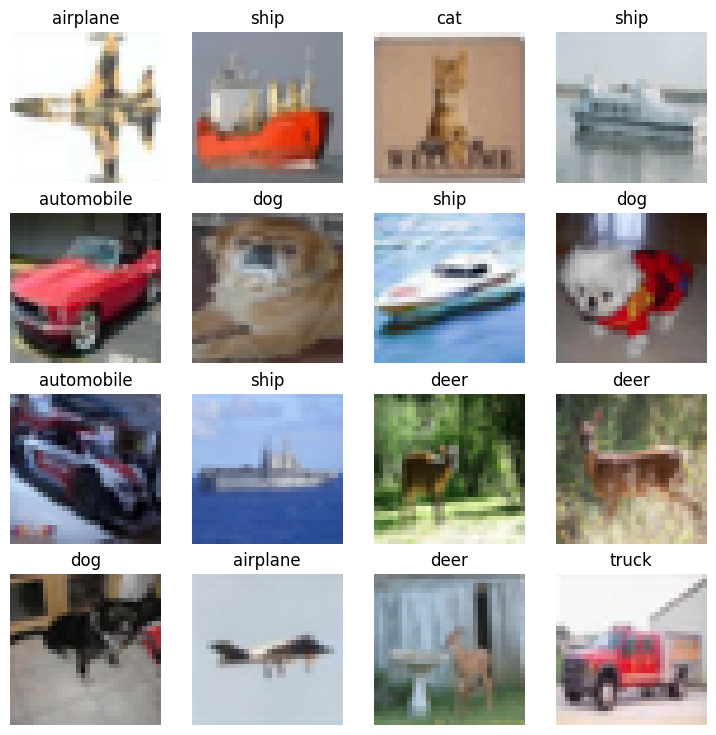

In [10]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(torch.permute(img, (1, 2, 0)))
    plt.title(class_names[label])
    plt.axis('Off');

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [12]:
len(train_dataloader), len(test_dataloader)

(1563, 313)

In [13]:
1563 * 32, 313 * 32

(50016, 10016)

In [14]:
class CNNModel(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*8*8, out_features=output_shape)
        )

    def forward(self, x):
        # return self.classifier(self.block2(self.block1(x)))
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)
        return x

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [16]:
model = CNNModel(input_shape=3, output_shape=len(class_names), hidden_units=20)
model

CNNModel(
  (block1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1280, out_features=10, bias=True)
  )
)

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.05)

In [42]:
def accuracy_fn(true, pred):
    correct = torch.eq(true, pred).sum().item()
    acc = correct / len(pred) * 100
    return acc

In [43]:
def train_step(model, dataloader, loss_fn, optimizer, accuracy_fn, device=device):
    model.to(device)
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss
        train_acc += accuracy_fn(true=y, pred=pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    print(f'Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%\n')

In [20]:
def test_step(model, dataloader, loss_fn, accuracy_fn, device=device):
    model.to(device)
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y)
            test_acc += accuracy_fn(true=y, pred=pred.argmax(dim=1))

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    print(f'Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n')

In [45]:
epochs = 20

for epoch in range(epochs):
    print(f'Epoch {epoch} -------------------------------------------------')
    train_step(model, train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
    test_step(model, test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

Epoch 0 -------------------------------------------------
Train Loss: 0.72986 | Train Accuracy: 74.52%

Test Loss: 0.99334 | Test Accuracy: 67.04%

Epoch 1 -------------------------------------------------
Train Loss: 0.71367 | Train Accuracy: 74.79%

Test Loss: 1.01745 | Test Accuracy: 66.37%

Epoch 2 -------------------------------------------------
Train Loss: 0.70148 | Train Accuracy: 75.51%

Test Loss: 1.01861 | Test Accuracy: 67.39%

Epoch 3 -------------------------------------------------
Train Loss: 0.69227 | Train Accuracy: 75.74%

Test Loss: 1.14725 | Test Accuracy: 63.43%

Epoch 4 -------------------------------------------------
Train Loss: 0.68467 | Train Accuracy: 75.95%

Test Loss: 0.92466 | Test Accuracy: 69.39%

Epoch 5 -------------------------------------------------
Train Loss: 0.67431 | Train Accuracy: 76.25%

Test Loss: 0.92996 | Test Accuracy: 69.47%

Epoch 6 -------------------------------------------------
Train Loss: 0.66707 | Train Accuracy: 76.64%

Test Los

In [46]:
def make_preds(model, data, device=device):
    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logits = model(sample)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [47]:
import random
test_samples, test_labels = [], []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [48]:
pred_probs = make_preds(model, test_samples)
pred_probs[:2]

tensor([[5.8955e-04, 3.0351e-01, 3.3489e-08, 1.1780e-04, 6.5366e-07, 3.9681e-05,
         8.7107e-09, 7.1744e-04, 2.9435e-06, 6.9502e-01],
        [7.4559e-09, 1.1989e-08, 5.5308e-07, 4.8101e-08, 9.7580e-04, 5.9210e-06,
         2.8702e-11, 9.9902e-01, 3.2924e-09, 1.0133e-07]])

In [49]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([9, 7, 9, 8, 7, 7, 4, 6, 4]), [1, 7, 9, 2, 7, 7, 2, 6, 4])

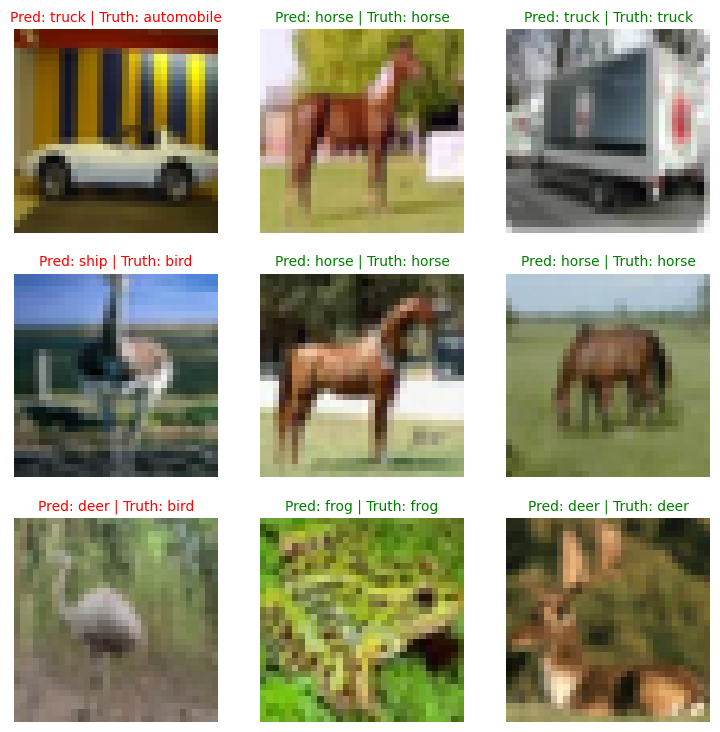

In [50]:
plt.figure(figsize=(9,9))
nrows, ncols = 3, 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(torch.permute(sample.squeeze(), (1, 2, 0)), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis('Off');

In [51]:
from tqdm.auto import tqdm

y_preds = []
model.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making Predictions'):
        X, y = X.to(device), y.to(device)
        y_logits = model(X)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [52]:
!pip install -q torchmetrics mlxtend

In [53]:
torch.tensor(test_data.targets)

tensor([3, 8, 8,  ..., 5, 1, 7])

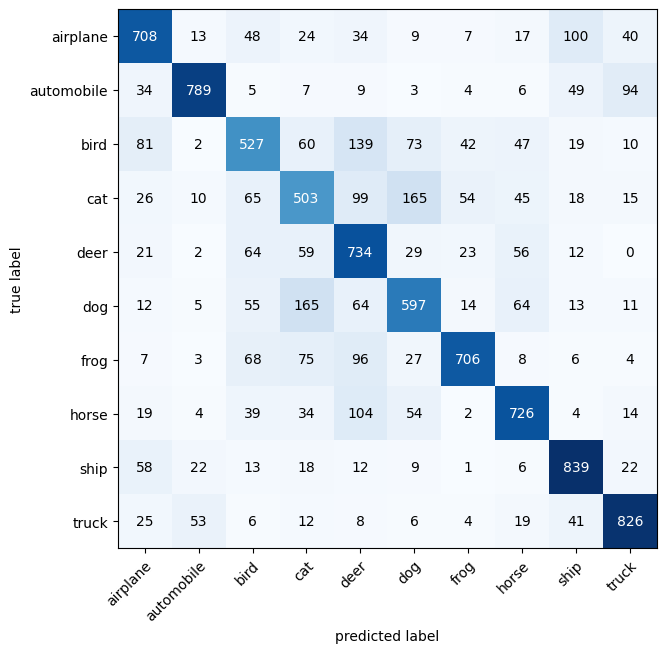

In [54]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=torch.tensor(test_data.targets))

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names=class_names, figsize=(10, 7));